In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Prepare  Dataset

In [43]:
df = pd.read_csv("Stunting_Dataset.csv")
df

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes
...,...,...,...,...,...,...,...,...
9995,Male,15,3.0,49,9.0,63.0,No,Yes
9996,Female,12,2.8,48,7.7,63.0,No,No
9997,Male,16,2.8,49,7.7,49.0,No,No
9998,Male,14,2.8,49,10.0,69.0,No,Yes


# EDA

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [45]:
df.isnull().sum()

Gender           0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
Breastfeeding    0
Stunting         0
dtype: int64

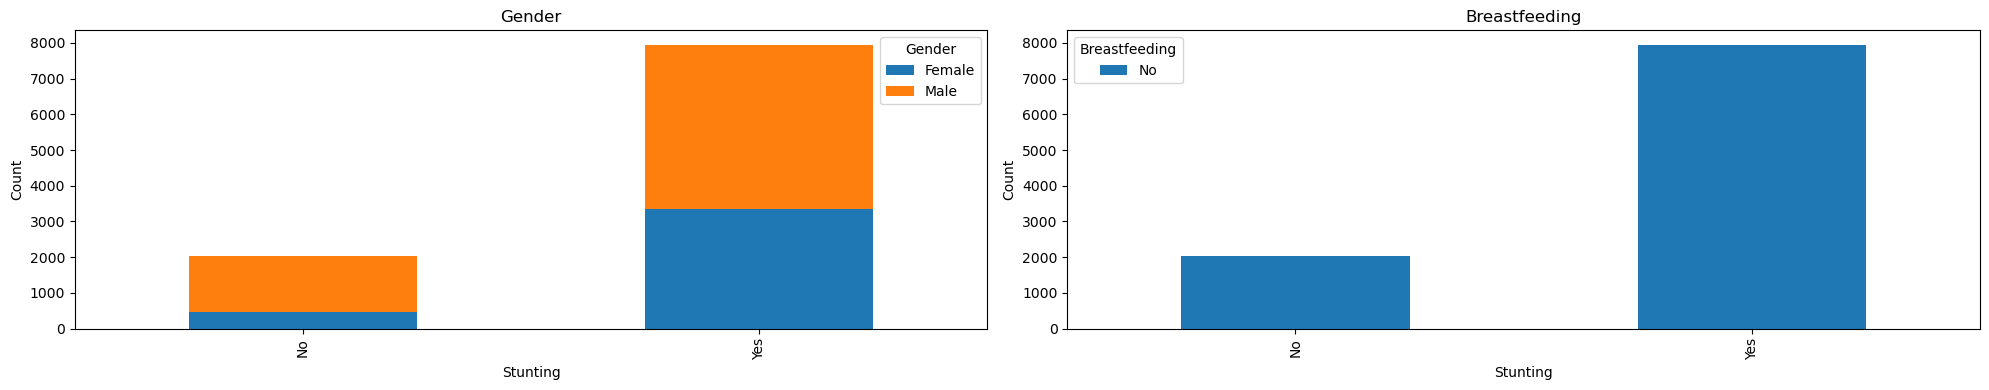

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Distribution of categorical variables
categorical_vars = [
    'Gender', 'Breastfeeding'
]

# Buat subplots sesuai jumlah variabel kategorikal
fig, axes = plt.subplots((len(categorical_vars) + 2) // 3, 2, figsize=(20, len(categorical_vars) * 2))
axes = axes.flatten()

# Plot stacked bar chart untuk setiap variabel kategorik
for i, var in enumerate(categorical_vars):
    if var in df.columns:
        counts = df.groupby(['Stunting', var]).size().unstack(fill_value=0)
        counts.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_title(var)
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('Stunting')
    else:
        axes[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [47]:
df['Gender'].replace(['Male', 'Female'], [0,1], inplace=True)
df['Breastfeeding'].replace(['No', 'Yes'], [0,1], inplace=True)
df['Stunting'].replace(['No', 'Yes'], [0,1], inplace=True)
df.head(10)

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,0,17,3.0,49,10.0,72.2,0,0
1,1,11,2.9,49,2.9,65.0,0,1
2,0,16,2.9,49,8.5,72.2,0,1
3,0,31,2.8,49,6.4,63.0,0,1
4,0,15,3.1,49,10.5,49.0,0,1
5,1,11,2.8,49,8.5,65.0,0,0
6,0,35,2.8,49,10.5,72.2,0,1
7,1,17,2.8,49,8.0,63.0,0,1
8,1,10,2.7,49,8.4,73.5,0,0
9,1,16,2.8,49,8.5,65.0,0,1


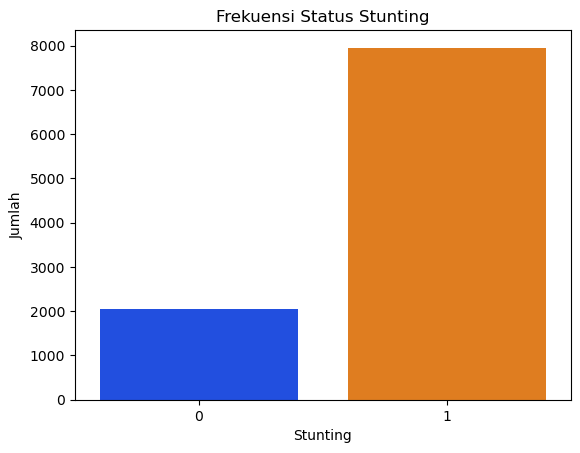

In [48]:
#Visualisasi model

#impor library yang bisa digunakan untuk visualisasi data seperti membuat grafik seperti judul, label, 
#dan lain-lain.
import matplotlib.pyplot as plt

#untuk mengatur warnanya
import seaborn as sns

#ntuk menampilkan count plot, yang secara default menunjukkan frekuensi dari dari variabel yang digunakan
#Menetapkan sstunting senagai variabel pada sumbu x
#Menetapkan palet warna untuk grafik
sns.countplot(x='Stunting', data=df, palette='bright')
#Menambahkan judul di atas grafik.
plt.title('Frekuensi Status Stunting')
#Menambahkan label untuk sumbu x dan y.
plt.xlabel('Stunting')
plt.ylabel('Jumlah')
#menampilkan grafiknya
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2804\1506641860.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2804\1506641860.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2804\1506641860.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2804\1506641860.py:18: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


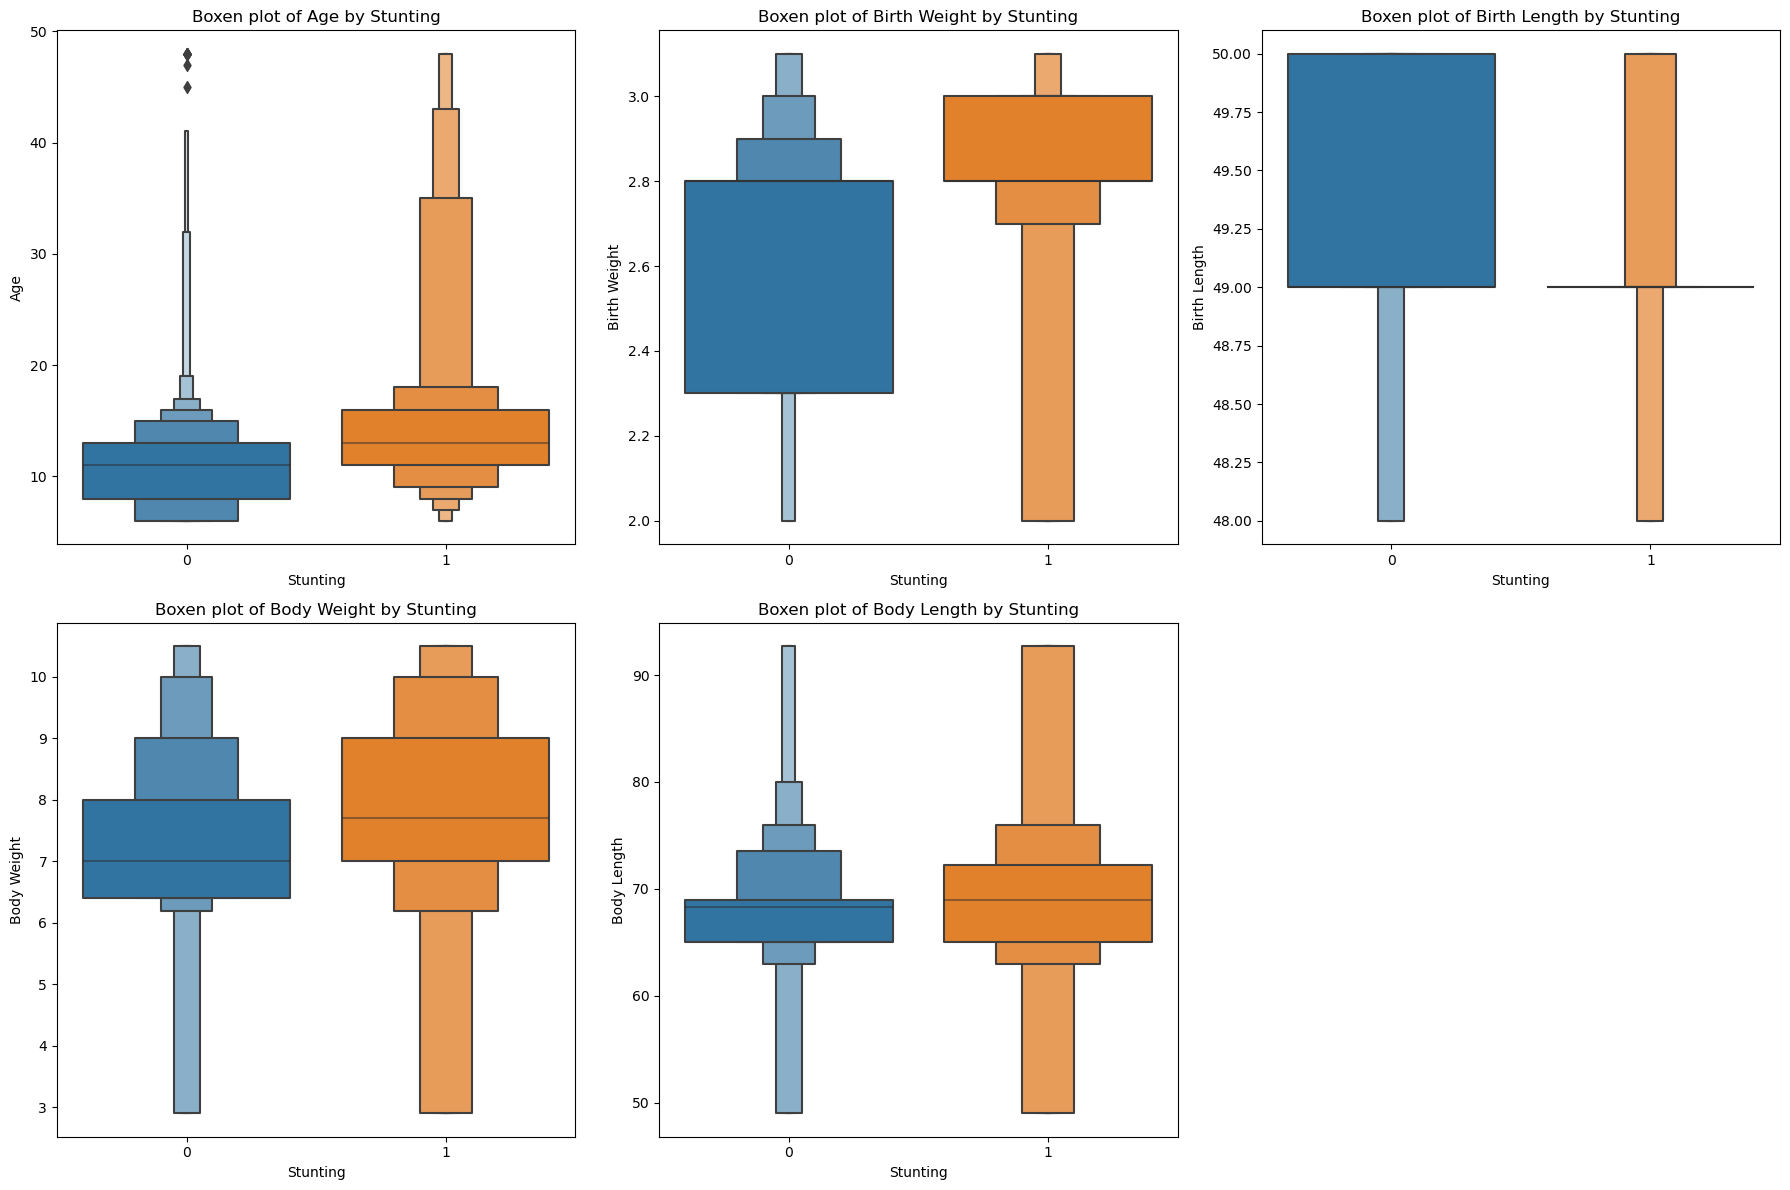

In [49]:
# 3. Distribution of numerical columns
numeric_vars = [
    'Age',
    'Birth Weight',
    'Birth Length',
    'Body Weight',
    'Body Length'
]

# Membuat boxen plot untuk masing-masing variabel numerik
plt.figure(figsize=(18, 12))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxenplot(x='Stunting', y=var, data=df)
    plt.title(f'Boxen plot of {var} by Stunting')
    plt.xlabel('Stunting')
    plt.ylabel(var)
    plt.tight_layout()

plt.show()

# RBF

In [50]:
# Selecting the columns and converting to NumPy arrays
X = df[['Gender', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length', 'Breastfeeding']].to_numpy()
y = df['Stunting'].to_numpy()

# Standardisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE
from imblearn.over_sampling import SMOTE

# Balancing the training data using SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [51]:
# Corrected RBF Network implementation
class RBFNetwork(BaseEstimator, ClassifierMixin):
    def __init__(self, k=10, gamma=None):
        self.k = k
        self.gamma = gamma
    
    def _rbf(self, X, centers, gamma):
        # Compute RBF (Gaussian) for each center
        G = np.exp(-gamma * np.linalg.norm(X[:, np.newaxis] - centers, axis=2)**2)
        return G
    
    def fit(self, X, y):
        # Use KMeans to find centers
        kmeans = KMeans(n_clusters=self.k, random_state=42)
        kmeans.fit(X)
        self.centers = kmeans.cluster_centers_
        
        # Calculate gamma if not provided
        if self.gamma is None:
            d_max = np.max(np.linalg.norm(self.centers - self.centers[:, np.newaxis], axis=2))
            self.gamma = 1 / (2 * (d_max / np.sqrt(2 * self.k))**2)
        
        # Transform X to RBF space
        G = self._rbf(X, self.centers, self.gamma)
        
        # Fit linear regression model in RBF space
        self.model = LinearRegression()
        self.model.fit(G, y)
        
        return self
    
    def predict(self, X):
        G = self._rbf(X, self.centers, self.gamma)
        return self.model.predict(G)

In [52]:
# Train the RBF network
rbf = RBFNetwork(k=50)
rbf.fit(X_train, y_train)

# Predict the output on the test set
y_pred = rbf.predict(X_test)

# Evaluate the performance of the model using accuracy score
acc = accuracy_score(y_test, y_pred.round())
print(f"Accuracy score: {acc:.3f}")

Accuracy score: 0.798


# MLP

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)

# Predict the output on the test set
y_pred = mlp.predict(X_test)

# Evaluate the performance of the model using accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc:.3f}")

Accuracy score: 0.771


In [54]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Membuat confusion matrix dan classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.69      0.55       407
           1       0.91      0.79      0.85      1593

    accuracy                           0.77      2000
   macro avg       0.68      0.74      0.70      2000
weighted avg       0.82      0.77      0.79      2000



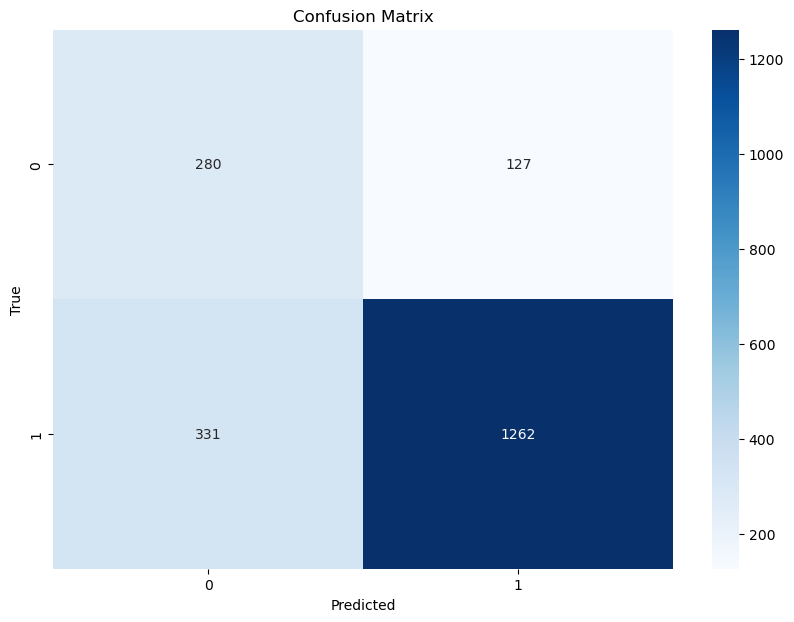

In [55]:
# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# MLP GridSearchCV

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [57]:
# Definisi parameter grid untuk GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

# Inisialisasi MLPClassifier
mlp = MLPClassifier(max_iter=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=3)

# Melatih model menggunakan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best parameters found: ", grid_search.best_params_)

# Memprediksi hasil pada test set menggunakan model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mengevaluasi kinerja model menggunakan accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc:.3f}")

Best parameters found:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy score: 0.777


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [58]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Membuat confusion matrix dan classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.71      0.56       407
           1       0.91      0.79      0.85      1593

    accuracy                           0.78      2000
   macro avg       0.69      0.75      0.71      2000
weighted avg       0.82      0.78      0.79      2000



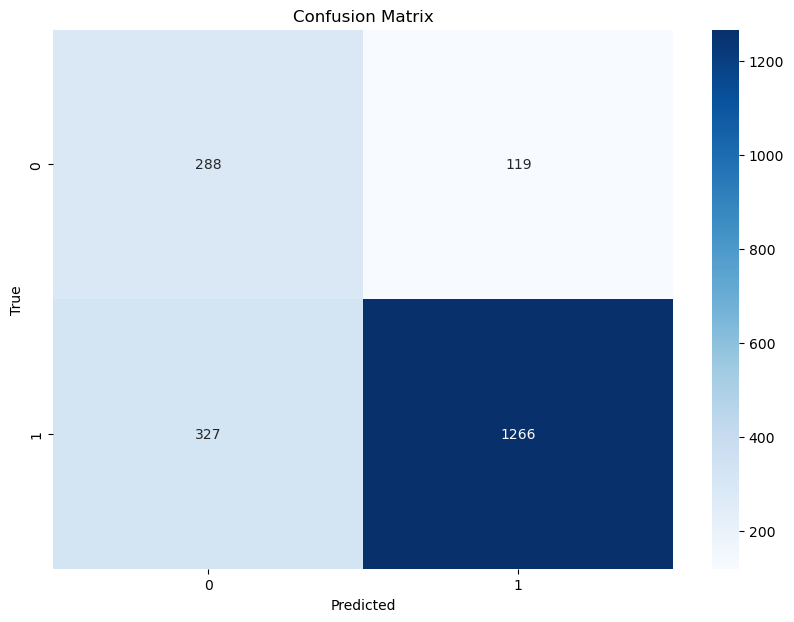

In [59]:
# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# MLP RandomizedSearchCV

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint

In [61]:
# Definisi parameter grid untuk RandomizedSearchCV
param_dist = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': uniform(0.0001, 0.05),
    'learning_rate': ['constant', 'adaptive']
}

# Inisialisasi MLPClassifier
mlp = MLPClassifier(max_iter=100)

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=100, n_jobs=-1, cv=3, random_state=42)

# Melatih model menggunakan RandomizedSearchCV
random_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best parameters found: ", random_search.best_params_)

# Memprediksi hasil pada test set menggunakan model terbaik
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mengevaluasi kinerja model menggunakan accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc:.3f}")

Best parameters found:  {'activation': 'relu', 'alpha': 0.01772844281670845, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Accuracy score: 0.776


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


# MLP Bayesian

In [62]:
pip install bayesian-optimization

Note: you may need to restart the kernel to use updated packages.


In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from bayes_opt import BayesianOptimization

In [64]:
# Fungsi untuk optimisasi Bayesian
def mlp_evaluate(hidden_layer_sizes, alpha, learning_rate_init):
    hidden_layer_sizes = int(hidden_layer_sizes)
    alpha = 10 ** alpha
    learning_rate_init = 10 ** learning_rate_init

    mlp = MLPClassifier(hidden_layer_sizes=(hidden_layer_sizes,),
                        alpha=alpha,
                        learning_rate_init=learning_rate_init,
                        max_iter=100,
                        random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Bounded region of parameter space
pbounds = {
    'hidden_layer_sizes': (10, 100),
    'alpha': (-5, 2),
    'learning_rate_init': (-5, 0)
}

# Inisialisasi Bayesian Optimization
optimizer = BayesianOptimization(
    f=mlp_evaluate,
    pbounds=pbounds,
    random_state=42,
)

# Melakukan optimisasi
optimizer.maximize(init_points=10, n_iter=30)

# Menampilkan parameter terbaik
print("Best parameters found: ", optimizer.max)

# Memprediksi hasil pada test set menggunakan model terbaik
params = optimizer.max['params']
best_mlp = MLPClassifier(hidden_layer_sizes=(int(params['hidden_layer_sizes']),),
                         alpha=10 ** params['alpha'],
                         learning_rate_init=10 ** params['learning_rate_init'],
                         max_iter=100,
                         random_state=42)
best_mlp.fit(X_train, y_train)
y_pred = best_mlp.predict(X_test)

# Mengevaluasi kinerja model menggunakan accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc:.3f}")

|   iter    |  target   |   alpha   | hidden... | learni... |
-------------------------------------------------------------
| 1         | 0.7855    | -2.378    | 95.56     | -1.34     |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 2         | 0.787     | -0.8094   | 24.04     | -4.22     |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 3         | 0.772     | -4.593    | 87.96     | -1.994    |
| 4         | 0.807     | -0.04349  | 11.85     | -0.1505   |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 5         | 0.788     | 0.8271    | 29.11     | -4.091    |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 6         | 0.792     | -3.716    | 37.38     | -2.376    |
| 7         | 0.7835    | -1.976    | 36.21     | -1.941    |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 8         | 0.7785    | -4.024    | 36.29     | -3.168    |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 9         | 0.781     | -1.808    | 80.67     | -4.002    |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 10        | 0.781     | -1.4      | 63.32     | -4.768    |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 11        | 0.785     | -0.5585   | 24.06     | -4.05     |
| 12        | 0.7885    | 0.6475    | 11.64     | -0.3971   |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 13        | 0.792     | -0.7501   | 24.12     | -4.295    |
| 14        | 0.7605    | 0.5199    | 12.08     | -0.3195   |
| 15        | 0.7845    | -0.1171   | 11.69     | -0.3735   |
| 16        | 0.832     | 0.638     | 11.47     | -0.137    |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 17        | 0.7765    | -4.339    | 82.11     | -2.021    |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 18        | 0.7995    | -3.697    | 37.01     | -2.394    |
| 19        | 0.736     | 0.2999    | 11.35     | -0.0187   |
| 20        | 0.812     | 0.9048    | 11.44     | -0.3427   |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 21        | 0.783     | -2.842    | 87.5      | -4.531    |
| 22        | 0.774     | 0.7152    | 11.72     | -0.2488   |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 23        | 0.779     | -3.123    | 32.98     | -2.478    |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 24        | 0.7775    | -0.7135   | 15.54     | -2.876    |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 25        | 0.7835    | -0.8536   | 74.77     | -4.36     |
| 26        | 0.6915    | 1.62      | 50.63     | -0.4485   |
| 27        | 0.7795    | -0.1334   | 11.8      | -0.01576  |
| 28        | 0.732     | -2.646    | 15.23     | -0.6074   |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 29        | 0.759     | -3.504    | 36.71     | -2.51     |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 30        | 0.7825    | 0.8908    | 29.15     | -3.992    |
| 31        | 0.742     | -0.05437  | 11.87     | -0.1423   |
| 32        | 0.829     | -1.313    | 29.91     | -0.3205   |
| 33        | 0.767     | -4.508    | 80.26     | -0.6374   |
| 34        | 0.7915    | -3.66     | 47.86     | -0.5825   |
| 35        | 0.8275    | -0.681    | 14.24     | -0.7779   |
| 36        | 0.7685    | 0.6931    | 78.49     | -1.724    |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 37        | 0.7875    | -3.401    | 31.46     | -4.214    |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 38        | 0.7485    | -4.559    | 35.88     | -1.808    |
| 39        | 0.7845    | 0.9287    | 33.77     | -2.367    |


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


| 40        | 0.7675    | -4.595    | 50.87     | -4.141    |
Best parameters found:  {'target': 0.832, 'params': {'alpha': 0.6380391579683256, 'hidden_layer_sizes': 11.469588055878903, 'learning_rate_init': -0.1369680516751206}}
Accuracy score: 0.832


# MLP Hyperopt

In [65]:
pip install hyperopt

Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK

In [67]:
# Ruang pencarian hyperparameter
space = {
    'hidden_layer_sizes': hp.quniform('hidden_layer_sizes', 10, 100, 1),
    'activation': hp.choice('activation', ['tanh', 'relu']),
    'solver': hp.choice('solver', ['sgd', 'adam']),
    'alpha': hp.loguniform('alpha', np.log(1e-5), np.log(1e-2)),
    'learning_rate': hp.choice('learning_rate', ['constant', 'adaptive'])
}

# Fungsi objektif untuk Hyperopt
def objective(params):
    mlp = MLPClassifier(hidden_layer_sizes=(int(params['hidden_layer_sizes']),),
                        activation=params['activation'],
                        solver=params['solver'],
                        alpha=params['alpha'],
                        learning_rate=params['learning_rate'],
                        max_iter=100,
                        random_state=42)

    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return {'loss': -acc, 'status': STATUS_OK}

# Optimisasi dengan Hyperopt
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials,
            rstate=np.random.default_rng(42))

# Menampilkan parameter terbaik
print("Best parameters found: ", best)

# Memprediksi hasil pada test set menggunakan model terbaik
best_mlp = MLPClassifier(hidden_layer_sizes=(int(best['hidden_layer_sizes']),),
                         activation=['tanh', 'relu'][best['activation']],
                         solver=['sgd', 'adam'][best['solver']],
                         alpha=best['alpha'],
                         learning_rate=['constant', 'adaptive'][best['learning_rate']],
                         max_iter=100,
                         random_state=42)
best_mlp.fit(X_train, y_train)
y_pred = best_mlp.predict(X_test)

# Mengevaluasi kinerja model menggunakan accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc:.3f}")

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

  1%|          | 1/100 [00:06<10:55,  6.62s/trial, best loss: -0.771]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



  2%|▏         | 2/100 [00:12<09:48,  6.00s/trial, best loss: -0.7775]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



  3%|▎         | 3/100 [00:16<08:08,  5.03s/trial, best loss: -0.7775]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



  4%|▍         | 4/100 [00:21<08:07,  5.08s/trial, best loss: -0.788] 

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



  5%|▌         | 5/100 [00:25<07:32,  4.77s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



  6%|▌         | 6/100 [00:30<07:22,  4.70s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



  7%|▋         | 7/100 [00:38<09:20,  6.03s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



  8%|▊         | 8/100 [00:46<10:08,  6.61s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



  9%|▉         | 9/100 [00:53<10:16,  6.77s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 10%|█         | 10/100 [01:00<09:58,  6.65s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 11%|█         | 11/100 [01:03<08:35,  5.79s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 12%|█▏        | 12/100 [01:09<08:20,  5.69s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 13%|█▎        | 13/100 [01:16<08:50,  6.10s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 14%|█▍        | 14/100 [01:21<08:17,  5.79s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 15%|█▌        | 15/100 [01:27<08:25,  5.94s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 16%|█▌        | 16/100 [01:36<09:17,  6.63s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 17%|█▋        | 17/100 [01:42<08:54,  6.43s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 18%|█▊        | 18/100 [01:46<08:04,  5.91s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 19%|█▉        | 19/100 [01:52<08:00,  5.93s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 20%|██        | 20/100 [01:59<08:15,  6.20s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 21%|██        | 21/100 [02:04<07:33,  5.74s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 22%|██▏       | 22/100 [02:08<07:00,  5.39s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 23%|██▎       | 23/100 [02:13<06:50,  5.33s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 24%|██▍       | 24/100 [02:18<06:35,  5.20s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 25%|██▌       | 25/100 [02:23<06:23,  5.12s/trial, best loss: -0.788]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 26%|██▌       | 26/100 [02:28<06:17,  5.11s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 27%|██▋       | 27/100 [02:33<06:12,  5.11s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 28%|██▊       | 28/100 [02:39<06:16,  5.23s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 29%|██▉       | 29/100 [02:43<05:47,  4.90s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 30%|███       | 30/100 [02:48<05:46,  4.94s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 31%|███       | 31/100 [02:55<06:16,  5.45s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 32%|███▏      | 32/100 [03:01<06:15,  5.52s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 33%|███▎      | 33/100 [03:05<05:41,  5.09s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 34%|███▍      | 34/100 [03:10<05:40,  5.16s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 35%|███▌      | 35/100 [03:16<06:02,  5.58s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 36%|███▌      | 36/100 [03:21<05:33,  5.21s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 37%|███▋      | 37/100 [03:27<05:40,  5.41s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 38%|███▊      | 38/100 [03:31<05:12,  5.05s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 39%|███▉      | 39/100 [03:36<05:00,  4.93s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 40%|████      | 40/100 [03:41<05:04,  5.07s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 41%|████      | 41/100 [03:45<04:41,  4.78s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 42%|████▏     | 42/100 [03:52<05:06,  5.28s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 43%|████▎     | 43/100 [03:59<05:31,  5.82s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 44%|████▍     | 44/100 [04:03<05:02,  5.41s/trial, best loss: -0.7885]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 45%|████▌     | 45/100 [04:09<05:10,  5.65s/trial, best loss: -0.79]  

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 46%|████▌     | 46/100 [04:16<05:27,  6.06s/trial, best loss: -0.79]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 47%|████▋     | 47/100 [04:22<05:21,  6.07s/trial, best loss: -0.79]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 48%|████▊     | 48/100 [04:28<05:14,  6.05s/trial, best loss: -0.79]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 49%|████▉     | 49/100 [04:35<05:18,  6.25s/trial, best loss: -0.79]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 50%|█████     | 50/100 [04:41<05:04,  6.10s/trial, best loss: -0.79]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 51%|█████     | 51/100 [04:45<04:32,  5.57s/trial, best loss: -0.79]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 52%|█████▏    | 52/100 [04:51<04:33,  5.69s/trial, best loss: -0.79]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 53%|█████▎    | 53/100 [04:59<05:05,  6.50s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 54%|█████▍    | 54/100 [05:06<04:55,  6.42s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 55%|█████▌    | 55/100 [05:13<05:01,  6.69s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 56%|█████▌    | 56/100 [05:19<04:48,  6.55s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 57%|█████▋    | 57/100 [05:27<04:54,  6.85s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 58%|█████▊    | 58/100 [05:34<04:50,  6.91s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 59%|█████▉    | 59/100 [05:39<04:25,  6.47s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 60%|██████    | 60/100 [05:48<04:39,  6.99s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 61%|██████    | 61/100 [05:55<04:43,  7.26s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 62%|██████▏   | 62/100 [06:02<04:27,  7.03s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 63%|██████▎   | 63/100 [06:11<04:38,  7.52s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 64%|██████▍   | 64/100 [06:17<04:13,  7.05s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 65%|██████▌   | 65/100 [06:22<03:53,  6.67s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 66%|██████▌   | 66/100 [06:27<03:28,  6.13s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 67%|██████▋   | 67/100 [06:34<03:25,  6.24s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 68%|██████▊   | 68/100 [06:39<03:14,  6.09s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 69%|██████▉   | 69/100 [06:44<02:53,  5.60s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 70%|███████   | 70/100 [06:52<03:06,  6.22s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 71%|███████   | 71/100 [06:57<02:50,  5.88s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 72%|███████▏  | 72/100 [07:02<02:41,  5.77s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 73%|███████▎  | 73/100 [07:08<02:38,  5.85s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 74%|███████▍  | 74/100 [07:14<02:28,  5.73s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 75%|███████▌  | 75/100 [07:20<02:27,  5.88s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 76%|███████▌  | 76/100 [07:26<02:23,  5.99s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 77%|███████▋  | 77/100 [07:33<02:24,  6.26s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 78%|███████▊  | 78/100 [07:40<02:21,  6.41s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 79%|███████▉  | 79/100 [07:47<02:17,  6.55s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 80%|████████  | 80/100 [07:54<02:13,  6.69s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 81%|████████  | 81/100 [08:00<02:03,  6.52s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 82%|████████▏ | 82/100 [08:05<01:52,  6.23s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 83%|████████▎ | 83/100 [08:11<01:44,  6.12s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 84%|████████▍ | 84/100 [08:17<01:36,  6.05s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 85%|████████▌ | 85/100 [08:23<01:29,  5.97s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 86%|████████▌ | 86/100 [08:30<01:26,  6.19s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 87%|████████▋ | 87/100 [08:35<01:16,  5.86s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 88%|████████▊ | 88/100 [08:41<01:10,  5.85s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 89%|████████▉ | 89/100 [08:47<01:05,  5.98s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 90%|█████████ | 90/100 [08:52<00:56,  5.69s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 91%|█████████ | 91/100 [08:58<00:51,  5.71s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 92%|█████████▏| 92/100 [09:06<00:51,  6.39s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 93%|█████████▎| 93/100 [09:12<00:44,  6.30s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 94%|█████████▍| 94/100 [09:17<00:36,  6.15s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 95%|█████████▌| 95/100 [09:22<00:28,  5.74s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 96%|█████████▌| 96/100 [09:27<00:22,  5.52s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 97%|█████████▋| 97/100 [09:32<00:15,  5.15s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 98%|█████████▊| 98/100 [09:37<00:10,  5.27s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



 99%|█████████▉| 99/100 [09:45<00:06,  6.22s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(



100%|██████████| 100/100 [09:50<00:00,  5.91s/trial, best loss: -0.801]

d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(




Best parameters found:  {'activation': 0, 'alpha': 0.0020107901745201853, 'hidden_layer_sizes': 95.0, 'learning_rate': 1, 'solver': 1}
Accuracy score: 0.801


d:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [68]:
import numpy as np
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Membuat confusion matrix dan classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.70      0.59       407
           1       0.91      0.83      0.87      1593

    accuracy                           0.80      2000
   macro avg       0.71      0.76      0.73      2000
weighted avg       0.83      0.80      0.81      2000



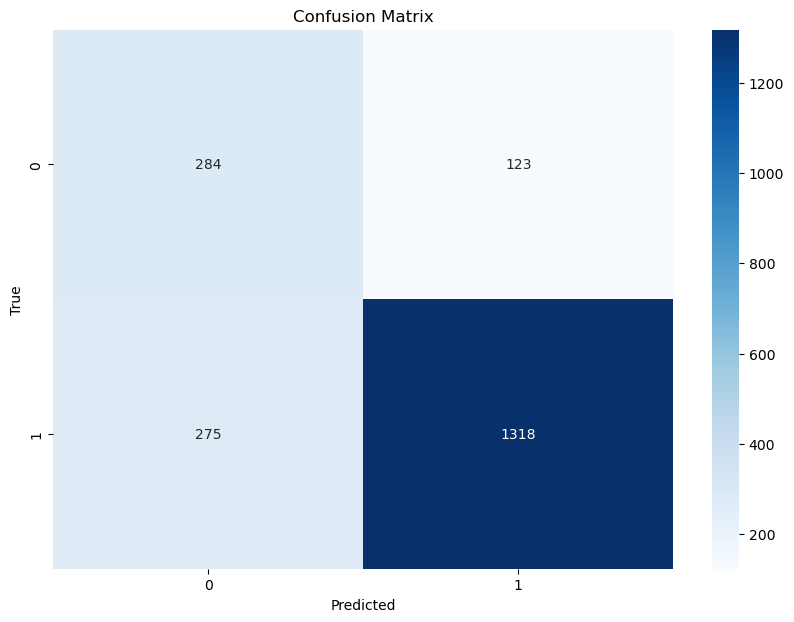

In [69]:
# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

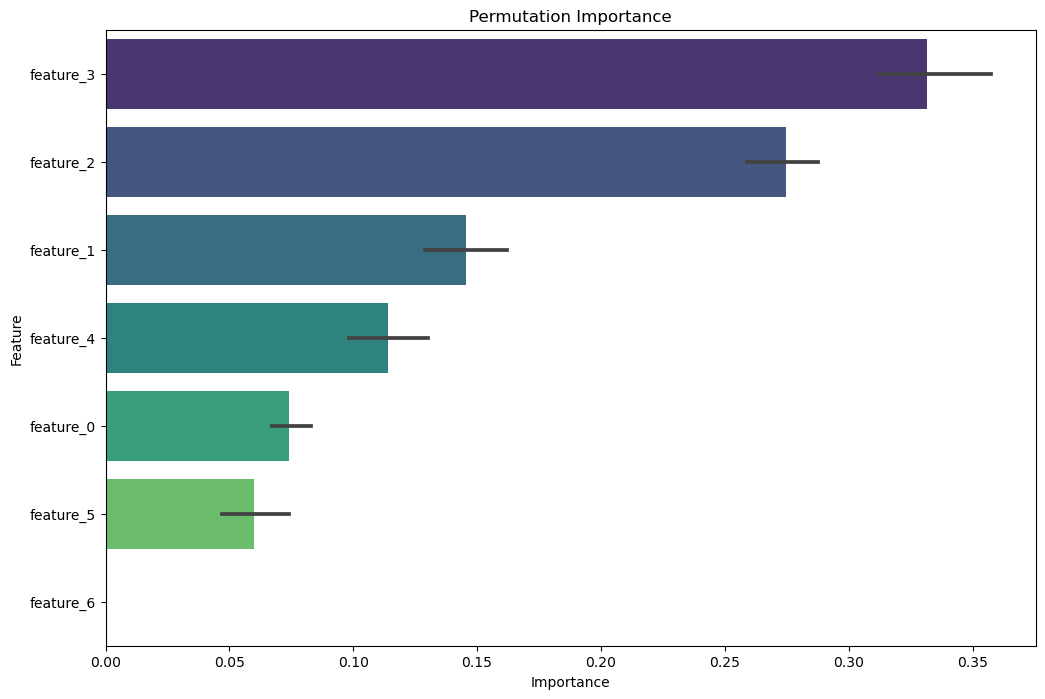

,importance
feature,
feature_3,0.331772
feature_2,0.274671
feature_1,0.145534
feature_4,0.113909
feature_0,0.074085
feature_5,0.060029
feature_6,0.000000


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

def plot_fi(model, X, y):
    if isinstance(X, pd.DataFrame):
        columns = X.columns.tolist()
    else:
        columns = [f'feature_{i}' for i in range(X.shape[1])]  # Example column names for NumPy array
    
    perm = permutation_importance(model, X, y, n_repeats=10, random_state=0, n_jobs=-1)
    perm2 = pd.DataFrame({'feature': columns * 10, 'importance': perm["importances"].transpose().reshape(-1)})
    perm2["importance"] = perm2.importance / perm2.importance.sum() * 10
    urut = perm2.groupby("feature").mean().sort_values("importance", ascending=False)
    
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=perm2, order=urut.index, palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title('Permutation Importance')
    plt.show()

    return urut

# Example usage
plot_fi(best_mlp, X_test, y_test)

In [90]:
print(df.columns[3])
print(df.columns[2])
print(df.columns[1])

Birth Length
Birth Weight
Age
